<img src="https://simpleicons.org/icons/github.svg" width="30" height="30" /> Github Repo

https://github.com/officialpm/Natural-Language-Processing-in-TensorFlow/

In [0]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [4]:
!wget --no-check-certificate \
   https://github.com/officialpm/Natural-Language-Processing-in-TensorFlow/raw/master/Week%202/Sarcasm%20Classifier/sarcasm-Full.json \
    -O sarcasm.json


--2020-05-13 11:51:06--  https://github.com/officialpm/Natural-Language-Processing-in-TensorFlow/raw/master/Week%202/Sarcasm%20Classifier/sarcasm-Full.json
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/officialpm/Natural-Language-Processing-in-TensorFlow/master/Week%202/Sarcasm%20Classifier/sarcasm-Full.json [following]
--2020-05-13 11:51:07--  https://raw.githubusercontent.com/officialpm/Natural-Language-Processing-in-TensorFlow/master/Week%202/Sarcasm%20Classifier/sarcasm-Full.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5616834 (5.4M) [text/plain]
Saving to: ‘sarcasm.json’

sarcasm.json 

In [0]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:
# del model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6578 - accuracy: 0.5974 - val_loss: 0.5572 - val_accuracy: 0.7739
Epoch 2/30
625/625 - 3s - loss: 0.4195 - accuracy: 0.8353 - val_loss: 0.3901 - val_accuracy: 0.8311
Epoch 3/30
625/625 - 3s - loss: 0.3043 - accuracy: 0.8824 - val_loss: 0.3547 - val_accuracy: 0.8515
Epoch 4/30
625/625 - 3s - loss: 0.2530 - accuracy: 0.9021 - val_loss: 0.3427 - val_accuracy: 0.8560
Epoch 5/30
625/625 - 3s - loss: 0.2174 - accuracy: 0.9163 - val_loss: 0.3454 - val_accuracy: 0.8557
Epoch 6/30
625/625 - 3s - loss: 0.1888 - accuracy: 0.9300 - val_loss: 0.3541 - val_accuracy: 0.8545
Epoch 7/30
625/625 - 3s - loss: 0.1671 - accuracy: 0.9376 - val_loss: 0.3686 - val_accuracy: 0.8556
Epoch 8/30
625/625 - 3s - loss: 0.1510 - accuracy: 0.9440 - val_loss: 0.3863 - val_accuracy: 0.8553
Epoch 9/30
625/625 - 3s - loss: 0.1346 - accuracy: 0.9524 - val_loss: 0.4039 - val_accuracy: 0.8532
Epoch 10/30
625/625 - 3s - loss: 0.1209 - accuracy: 0.9592 - val_loss: 0.4603 - val_accuracy: 0.8328

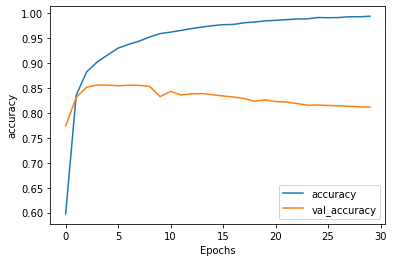

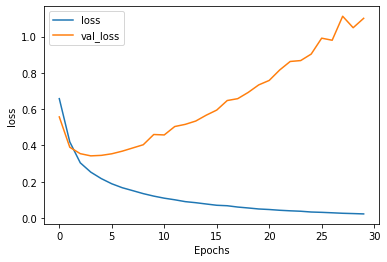

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [23]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [25]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.2614895e-01]
 [6.1806172e-06]]


In [0]:
model.save("Sarcasm-Classifier.h5")